# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
from citipy import citipy
import json
import requests
import pandas as pd
import random
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

import api_keys
from api_keys import weather_api_key
base_url = "http://api.openweathermap.org/data/2.5/weather?"

## Generate Cities List

In [2]:

city_list = []
country_list = []
no_data_cities = []
random.seed(100)
while len(city_list)<600:

    
    new_lat  = random.uniform(-90,90)
    new_long = random.uniform(-180,180)
    new_city = citipy.nearest_city(new_lat,new_long)
    new_city_name = new_city.city_name
    country_co = new_city.country_code

    if new_city_name not in city_list and new_city_name not in no_data_cities:
        url = base_url + "q=" + new_city_name+"," + country_co + "&units=imperial"+ "&appid=" + weather_api_key
        countries_response = requests.get(url).json()
        try:
            city_list.append(countries_response["name"])
            country_list.append(country_co)
        except:
            print(f"{new_city_name}, {country_co} is not in the weather data selecting new data point")
            no_data_cities.append(new_city_name)
            
print("list made. ready to proceed")


airai, pw is not in the weather data selecting new data point
mataura, pf is not in the weather data selecting new data point
sataua, ws is not in the weather data selecting new data point
mys shmidta, ru is not in the weather data selecting new data point
sentyabrskiy, ru is not in the weather data selecting new data point
hihifo, to is not in the weather data selecting new data point
tabukiniberu, ki is not in the weather data selecting new data point
saint anthony, ca is not in the weather data selecting new data point
khani, ru is not in the weather data selecting new data point
nioro, ml is not in the weather data selecting new data point
birin, dz is not in the weather data selecting new data point
illoqqortoormiut, gl is not in the weather data selecting new data point
meyungs, pw is not in the weather data selecting new data point
taolanaro, mg is not in the weather data selecting new data point
doha, kw is not in the weather data selecting new data point
ituni, gy is not in th

In [3]:
#create dataframe from city and country lists and to store weather data

weather_df = pd.DataFrame({'City': city_list,
              'Country': country_list})

weather_df['Latitude'] = ''
weather_df['Longitude'] = ''
weather_df['Max Temperature (F)'] = ''
weather_df['Humidity (%)'] = ''
weather_df['Cloudiness (%)'] = ''
weather_df['Wind Speed (mph)'] = ''

weather_df

,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Cape Town,za,,,,,,
1,Abay,kz,,,,,,
2,Rabo de Peixe,pt,,,,,,
3,Bad Doberan,de,,,,,,
4,Cape Town,za,,,,,,
...,...,...,...,...,...,...,...,...
595,Cockburn Town,tc,,,,,,
596,Saint-Augustin,ca,,,,,,
597,Chokurdakh,ru,,,,,,
598,Mount Gambier,au,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
for index,row in weather_df.iterrows():
    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    url = base_url + "q=" + row['City']+"," + row['Country'] + "&units=imperial"+ "&appid=" + weather_api_key
    #print(url)
    countries_response = requests.get(url).json()
    #print(json.dumps(countries_response, indent=4, sort_keys=True))
    try:
        weather_df.loc[index,'Latitude']  = countries_response['coord']['lat']
        weather_df.loc[index,'Longitude'] = countries_response['coord']['lon']
        weather_df.loc[index,'Max Temperature (F)']  = countries_response['main']['temp_max']
        weather_df.loc[index,'Humidity (%)']     = countries_response['main']['humidity']
        weather_df.loc[index,'Cloudiness (%)']   = countries_response['clouds']['all']
        weather_df.loc[index,'Wind Speed (mph)'] = countries_response['wind']['speed']
        weather_df.loc[index,'Date, Time'] = countries_response['dt']
        le_name = countries_response["name"]
        print(f"Processing Record {index + 1} | {le_name} | success")
    except:
        le_name = weather_df.loc[index,'City']
        print(f"Processing Record {index + 1} | {le_name} | fail")


Processing Record 1 | Cape Town | success
Processing Record 2 | Abay | success
Processing Record 3 | Rabo de Peixe | success
Processing Record 4 | Bad Doberan | success
Processing Record 5 | Cape Town | success
Processing Record 6 | Bluff | success
Processing Record 7 | Upernavik | success
Processing Record 8 | Busselton | success
Processing Record 9 | Rikitea | success
Processing Record 10 | Ushuaia | success
Processing Record 11 | Butaritari | success
Processing Record 12 | Bluff | success
Processing Record 13 | Fort Nelson | success
Processing Record 14 | Pacific Grove | success
Processing Record 15 | Ushuaia | success
Processing Record 16 | Duliby | success
Processing Record 17 | Albany | success
Processing Record 18 | Thompson | success
Processing Record 19 | Ambilobe | success
Processing Record 20 | Tuktoyaktuk | success
Processing Record 21 | Butaritari | success
Processing Record 22 | Kinwat | success
Processing Record 23 | Arrondissement de Clermont | success
Processing Record

Processing Record 192 | Ilulissat | success
Processing Record 193 | Cape Town | success
Processing Record 194 | Lakhipur | success
Processing Record 195 | Murgab | success
Processing Record 196 | Georgetown | success
Processing Record 197 | Torbay | success
Processing Record 198 | Ushuaia | success
Processing Record 199 | Itarema | success
Processing Record 200 | Rikitea | success
Processing Record 201 | Marabu | success
Processing Record 202 | Turukhansk | success
Processing Record 203 | Tungor | success
Processing Record 204 | Saskylakh | success
Processing Record 205 | Upernavik | success
Processing Record 206 | Gurbăneşti | success
Processing Record 207 | Kavieng | success
Processing Record 208 | Qaanaaq | success
Processing Record 209 | Ushuaia | success
Processing Record 210 | Jamestown | success
Processing Record 211 | Castro | success
Processing Record 212 | Cape Town | success
Processing Record 213 | Ushuaia | success
Processing Record 214 | East London | success
Processing Re

Processing Record 382 | Coahuayana Viejo | success
Processing Record 383 | Langsa | success
Processing Record 384 | Khatanga | success
Processing Record 385 | Yumen | success
Processing Record 386 | East London | success
Processing Record 387 | Hithadhoo | success
Processing Record 388 | Necochea | success
Processing Record 389 | Steamboat Springs | success
Processing Record 390 | Bluff | success
Processing Record 391 | Kropachëvo | success
Processing Record 392 | Srednekolymsk | success
Processing Record 393 | Busselton | success
Processing Record 394 | Saint-Philippe | success
Processing Record 395 | Albany | success
Processing Record 396 | Victoria | success
Processing Record 397 | Alofi | success
Processing Record 398 | Lebu | success
Processing Record 399 | Barrow | success
Processing Record 400 | Port Hardy | success
Processing Record 401 | Bambous Virieux | success
Processing Record 402 | Kapaa | success
Processing Record 403 | Pitrufquén | success
Processing Record 404 | Adrar 

Processing Record 570 | Punta Arenas | success
Processing Record 571 | Hilo | success
Processing Record 572 | Cayenne | success
Processing Record 573 | Miyako | success
Processing Record 574 | Tasiilaq | success
Processing Record 575 | Saryozek | success
Processing Record 576 | Rikitea | success
Processing Record 577 | Kapaa | success
Processing Record 578 | Kaitangata | success
Processing Record 579 | Carutapera | success
Processing Record 580 | Puerto Ayora | success
Processing Record 581 | Mar del Plata | success
Processing Record 582 | Popova | success
Processing Record 583 | Ushuaia | success
Processing Record 584 | Gengenbach | success
Processing Record 585 | Tasiilaq | success
Processing Record 586 | Nichinan | success
Processing Record 587 | Atuona | success
Processing Record 588 | Rikitea | success
Processing Record 589 | Butaritari | success
Processing Record 590 | Chui | success
Processing Record 591 | Ushuaia | success
Processing Record 592 | Vaini | success
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df.to_csv("output/raw_weather_data.csv")
weather_df

,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),"Date, Time"
0,Cape Town,za,-33.9258,18.4232,87.12,48,0,4,1.644081e+09
1,Abay,kz,49.6311,72.8539,3.58,67,0,11.77,1.644081e+09
2,Rabo de Peixe,pt,37.8,-25.5833,62.11,72,20,17.27,1.644081e+09
3,Bad Doberan,de,54.1071,11.9005,42.01,76,100,22.68,1.644081e+09
4,Cape Town,za,-33.9258,18.4232,87.12,48,0,4,1.644081e+09
...,...,...,...,...,...,...,...,...,...
595,Cockburn Town,tc,21.4612,-71.1419,76.37,68,10,18.34,1.644082e+09
596,Saint-Augustin,ca,51.226,-58.6502,4.91,93,100,16.17,1.644081e+09
597,Chokurdakh,ru,70.6333,147.9167,-32.15,100,100,1.86,1.644082e+09
598,Mount Gambier,au,-37.8333,140.7667,59.05,75,89,7.36,1.644081e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
outlier_df = weather_df.loc[weather_df["Humidity (%)"]>100]
clean_df = weather_df.loc[weather_df["Humidity (%)"]<=100]
outlier_df.head()

,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),"Date, Time"


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

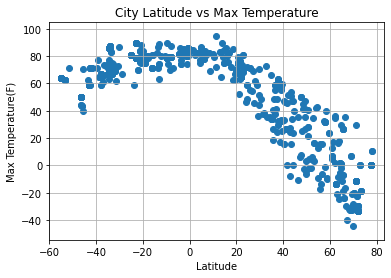

In [7]:
x_axis = clean_df['Latitude']
y_axis = clean_df['Max Temperature (F)']

plt.title('City Latitude vs Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')

plt.xlim(-5 + min (x_axis),max(x_axis)+5)
plt.ylim(min(y_axis)-10,max(y_axis)+10)

plt.scatter(x_axis,y_axis)

plt.xticks(np.arange(-60, 90, step=20))

plt.grid()
plt.savefig('output/Overall_Max_Temp.png')
plt.show()

## Latitude vs. Humidity Plot

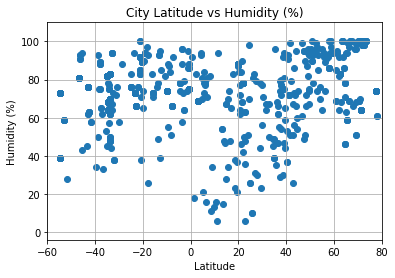

In [8]:
x_axis = clean_df['Latitude']
y_axis = clean_df['Humidity (%)']

plt.title('City Latitude vs Humidity (%)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.xlim(-2 + min (x_axis),max(x_axis)+2)
plt.ylim(min(y_axis)-10,max(y_axis)+10)

plt.scatter(x_axis,y_axis)

plt.xticks(np.arange(-60, 90, step=20))

plt.grid()
plt.savefig('output/Overall_Humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

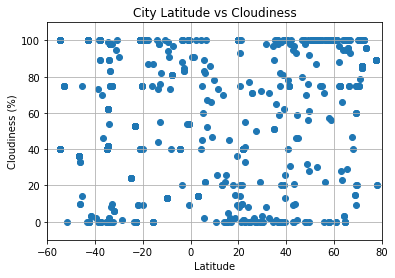

In [9]:
x_axis = clean_df['Latitude']
y_axis = clean_df['Cloudiness (%)']

plt.title('City Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.xlim(-2 + min (x_axis),max(x_axis)+2)
plt.ylim(min(y_axis)-10,max(y_axis)+10)

plt.scatter(x_axis,y_axis)

plt.xticks(np.arange(-60, 90, step=20))

plt.grid()
plt.savefig('output/Overall_Cloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

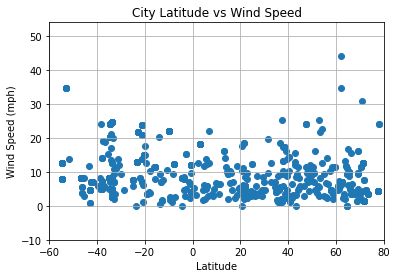

In [10]:
x_axis = clean_df['Latitude']
y_axis = clean_df['Wind Speed (mph)']

plt.title('City Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.xlim(-2 + min (x_axis),max(x_axis)+2)
plt.ylim(min(y_axis)-10,max(y_axis)+10)

plt.scatter(x_axis,y_axis)

plt.xticks(np.arange(-60, 90, step=20))

plt.grid()
plt.savefig('output/Overall_Wind_speed.png')
plt.show()

## Linear Regression

In [11]:
northen_df = clean_df.loc[clean_df['Latitude']>= 0]
southern_df = clean_df.loc[clean_df['Latitude']<= 0]
north_count = northen_df["City"].count()
south_count = southern_df["City"].count()

print(f"Number of cities in the Northern Hemisphere: {north_count}")
print(f"Number of cities in the Southern Hemisphere: {south_count}")

Number of cities in the Northern Hemisphere: 312
Number of cities in the Southern Hemisphere: 288


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -1.52x + 96.83


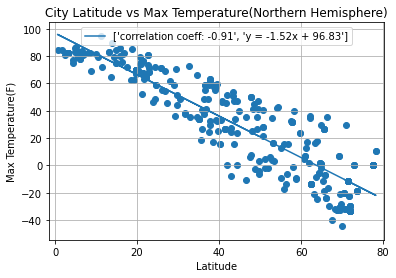

In [12]:
x_axis = northen_df['Latitude']
y_axis = northen_df['Max Temperature (F)']

slope, intercept, r_value, p_value, std_err = st.linregress(x_axis.astype(float),y_axis.astype(float))
fit = slope * x_axis + intercept
correlation = st.pearsonr(x_axis,y_axis)
corr = f"correlation coeff: {round(correlation[0],2)}"
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
label = [corr,line_eq]
plt.plot(x_axis,fit,label=label)
leg = plt.legend(loc='upper center')

plt.title('City Latitude vs Max Temperature(Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')

plt.xlim(-2 + min (x_axis),max(x_axis)+2)
plt.ylim(min(y_axis)-10,max(y_axis)+10)

plt.scatter(x_axis,y_axis)

plt.xticks(np.arange(0, max(x_axis)+10, step=20))

plt.grid()
plt.savefig('output/Northen_Max_Temp.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.44x + 85.64


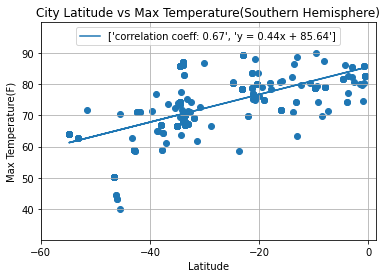

In [13]:
x_axis = southern_df['Latitude']
y_axis = southern_df['Max Temperature (F)']

slope, intercept, r_value, p_value, std_err = st.linregress(x_axis.astype(float),y_axis.astype(float))
fit = slope * x_axis + intercept
correlation = st.pearsonr(x_axis,y_axis)
corr = f"correlation coeff: {round(correlation[0],2)}"
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
label = [corr,line_eq]
plt.plot(x_axis,fit,label=label)
leg = plt.legend(loc='upper center')

plt.title('City Latitude vs Max Temperature(Southern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')

plt.xlim(-2 + min (x_axis),max(x_axis)+2)
plt.ylim(min(y_axis)-10,max(y_axis)+10)

plt.scatter(x_axis,y_axis)

plt.xticks(np.arange(-60, 5, step=20))

plt.grid()
plt.savefig('output/Southern_Max_Temp.png')
plt.show()



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.43x + 53.89


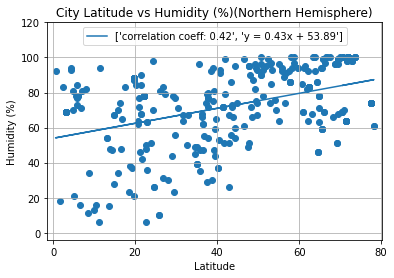

In [14]:
x_axis = northen_df['Latitude']
y_axis = northen_df['Humidity (%)']

slope, intercept, r_value, p_value, std_err = st.linregress(x_axis.astype(float),y_axis.astype(float))
fit = slope * x_axis + intercept
correlation = st.pearsonr(x_axis,y_axis)
corr = f"correlation coeff: {round(correlation[0],2)}"
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
label = [corr,line_eq]
plt.plot(x_axis,fit,label=label)
leg = plt.legend(loc='upper center')

plt.title('City Latitude vs Humidity (%)(Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.xlim(-2 + min (x_axis),max(x_axis)+2)
plt.ylim(min(y_axis)-10,max(y_axis)+20)

plt.scatter(x_axis,y_axis)

plt.xticks(np.arange(0, max(x_axis)+10, step=20))

plt.grid()
plt.savefig('output/Northen_Humidity.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.29x + 81.09


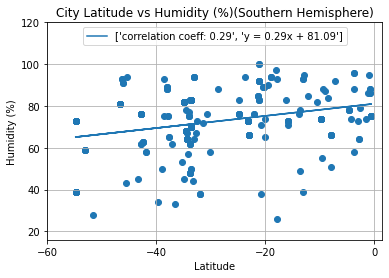

In [15]:
x_axis = southern_df['Latitude']
y_axis = southern_df['Humidity (%)']

slope, intercept, r_value, p_value, std_err = st.linregress(x_axis.astype(float),y_axis.astype(float))
fit = slope * x_axis + intercept
correlation = st.pearsonr(x_axis,y_axis)
corr = f"correlation coeff: {round(correlation[0],2)}"
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
label = [corr,line_eq]
plt.plot(x_axis,fit,label=label)
leg = plt.legend(loc='upper center')

plt.title('City Latitude vs Humidity (%)(Southern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.xlim(-2 + min (x_axis),max(x_axis)+2)
plt.ylim(min(y_axis)-10,max(y_axis)+20)

plt.scatter(x_axis,y_axis)

plt.xticks(np.arange(-60, 5, step=20))

plt.grid()
plt.savefig('output/Southern_Humidity.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.63x + 31.36


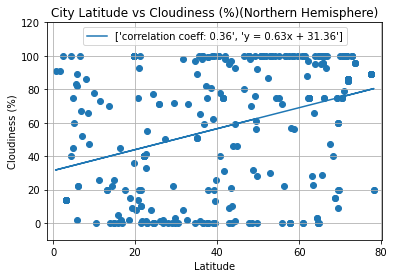

In [16]:
x_axis = northen_df['Latitude']
y_axis = northen_df['Cloudiness (%)']

slope, intercept, r_value, p_value, std_err = st.linregress(x_axis.astype(float),y_axis.astype(float))
fit = slope * x_axis + intercept
correlation = st.pearsonr(x_axis,y_axis)
corr = f"correlation coeff: {round(correlation[0],2)}"
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
label = [corr,line_eq]
plt.plot(x_axis,fit,label=label)
leg = plt.legend(loc='upper center')

plt.title('City Latitude vs Cloudiness (%)(Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.xlim(-2 + min (x_axis),max(x_axis)+2)
plt.ylim(min(y_axis)-10,max(y_axis)+20)

plt.scatter(x_axis,y_axis)

plt.xticks(np.arange(0, max(x_axis)+10, step=20))
plt.grid()
plt.savefig('output/Northen_Cloudiness.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.21x + 60.25


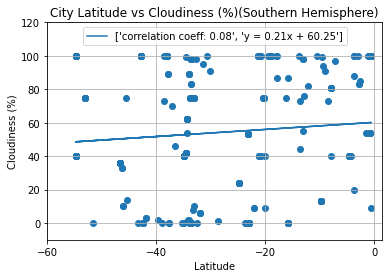

In [17]:
x_axis = southern_df['Latitude']
y_axis = southern_df['Cloudiness (%)']

slope, intercept, r_value, p_value, std_err = st.linregress(x_axis.astype(float),y_axis.astype(float))
fit = slope * x_axis + intercept
correlation = st.pearsonr(x_axis,y_axis)
corr = f"correlation coeff: {round(correlation[0],2)}"
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
label = [corr,line_eq]
plt.plot(x_axis,fit,label=label)
leg = plt.legend(loc='upper center')

plt.title('City Latitude vs Cloudiness (%)(Southern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.xlim(-2 + min (x_axis),max(x_axis)+2)
plt.ylim(min(y_axis)-10,max(y_axis)+20)

plt.scatter(x_axis,y_axis)

plt.xticks(np.arange(-60, 5, step=20))

plt.grid()
plt.savefig('output/Southern_Cloudiness.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.01x + 8.47


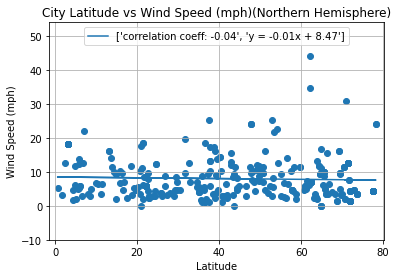

In [18]:
x_axis = northen_df['Latitude']
y_axis = northen_df['Wind Speed (mph)']

slope, intercept, r_value, p_value, std_err = st.linregress(x_axis.astype(float),y_axis.astype(float))
fit = slope * x_axis + intercept
correlation = st.pearsonr(x_axis,y_axis)
corr = f"correlation coeff: {round(correlation[0],2)}"
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
label = [corr,line_eq]
plt.plot(x_axis,fit,label=label)
leg = plt.legend(loc='upper center')

plt.title('City Latitude vs Wind Speed (mph)(Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.xlim(-2 + min (x_axis),max(x_axis)+2)
plt.ylim(min(y_axis)-10,max(y_axis)+10)

plt.scatter(x_axis,y_axis)

plt.xticks(np.arange(0, max(x_axis)+10, step=20))

plt.grid()
plt.savefig('output/Northen_Windspeed.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.03x + 10.58


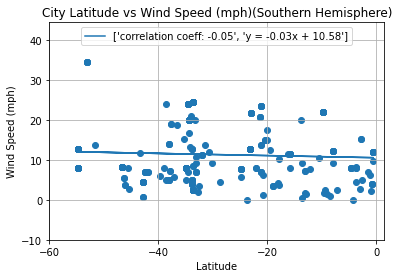

In [19]:
x_axis = southern_df['Latitude']
y_axis = southern_df['Wind Speed (mph)']

slope, intercept, r_value, p_value, std_err = st.linregress(x_axis.astype(float),y_axis.astype(float))
fit = slope * x_axis + intercept
correlation = st.pearsonr(x_axis,y_axis)
corr = f"correlation coeff: {round(correlation[0],2)}"
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
label = [corr,line_eq]
plt.plot(x_axis,fit,label=label)
leg = plt.legend(loc='upper center')

plt.xlim(-2 + min (x_axis),max(x_axis)+2)
plt.ylim(min(y_axis)-10,max(y_axis)+10)
plt.xticks(np.arange(-60, 5, step=20))
plt.grid()
plt.scatter(x_axis,y_axis)

plt.title('City Latitude vs Wind Speed (mph)(Southern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('output/Southern_Windspeed.png')
plt.show()

In [20]:
#Assumption: 
# Date was not considered when taking this data so if all datapoints are from the same day/week then seasonal factors may be contributing to the difference.
# At the time of pull data from the API it is summer in the Southern Hemisphere thus warmer conditions further from the equator (to an extent) 

In [21]:
#Observation 1 (Max Temp):
# Closer to the equator (latitude 0) the higher the maximum temperature.
# This would possibly be the equator being closer to the sun and getting more sunlight than the rest of the world


In [22]:
#Observation 1.5 (Max Temp):
# Southern temps are higher than those in the north 
# Due to the seasonal assumption cities in the Southern Hemisphere should have higher temperatures on average

In [23]:
#Observation 2 (Hummidity):
# As latitude increases hummidity increases 
# with lower temperature there would be lower velocity of molecules in the air thus allowing water molecules to be denser in the air increasing humidity

In [24]:
#observation 3:
# There is a weak positive correlation between latitude and cloudiness.
# For the difference in correlation and degree lattitude affects cloudiness,
# there are noticable less cities in the southern hemisphere below the -40 degree latitude mark than those in the north.
# This could result in cities closer to the -60 latitude skewing results.
# Date was not considered when taking this data so if all datapoints are from the same day/week then seasonal factors may be contributing to the difference.
# At the time of pull data from the API it is winter in the northen hemisphere thus colder conditions further from the equator could result in higher cloud cover.

# City selection heavily affects this had the correlation change from 0.4 to 0.15 

In [25]:
#observation 4:
# There is a weak negative correlation between latitude and windspeed in the Southern Hemisphere but none in the Northern.
#For the difference in correlation and degree lattitude affects cloudiness,
# there are noticable less cities in the southern hemisphere below the -40 degree latitude mark than those in the north.
# This could result in cities closer to the -60 latitude skewing results.
# higher temps in the south could result in higher evaporation in coastal areas.
# Evaporation is a contributing factor when it comes to wind spend 

In [26]:
#notes
# 90% of the population live in the Northern Hemisphere which could play a factor in city selection
# breaking the data into land locked and coastal would provide other insights into weather conditions
# City selection heavily affects hummidity and cloudiness with correlations changing by 0.3
# this resulted in humidity changing from no correlation to weak coorelation between code runs
# Air pressure was not taken into account which is linked to cloudiness, wind and hummidity 
